# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [3]:
# your code here
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
titanic.value_counts()

PassengerId  Survived  Pclass  Name                                      Gender  Age        SibSp  Parch  Ticket      Fare    Cabin  Embarked
1            0.0       3       Braund, Mr. Owen Harris                   male    22.000000  1      0      A/5 21171   7.250   U0     S           1
599          0.0       3       Boulos, Mr. Hanna                         male    27.749836  0      0      2664        7.225   U0     C           1
588          1.0       1       Frolicher-Stehli, Mr. Maxmillian          male    60.000000  1      1      13567       79.200  B41    C           1
589          0.0       3       Gilinski, Mr. Eliezer                     male    22.000000  0      0      14973       8.050   U0     S           1
590          0.0       3       Murdlin, Mr. Joseph                       male    29.513190  0      0      A./5. 3235  8.050   U0     S           1
                                                                                                                           

In [6]:
titanic.isna()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,False,False,False,False,False,False,False
1305,False,True,False,False,False,False,False,False,False,False,False,False
1306,False,True,False,False,False,False,False,False,False,False,False,False
1307,False,True,False,False,False,False,False,False,False,False,False,False


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.879186,0.498854,0.385027,33.281086
std,378.020061,0.486592,0.837836,13.448335,1.041658,0.865560,51.741500
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [30]:
int_ = titanic.select_dtypes(include=["float64", "int64"])
int_

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [9]:
titanic.select_dtypes(include=object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [10]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

#### Use the right visulalization to show the distribution of column `Age`.

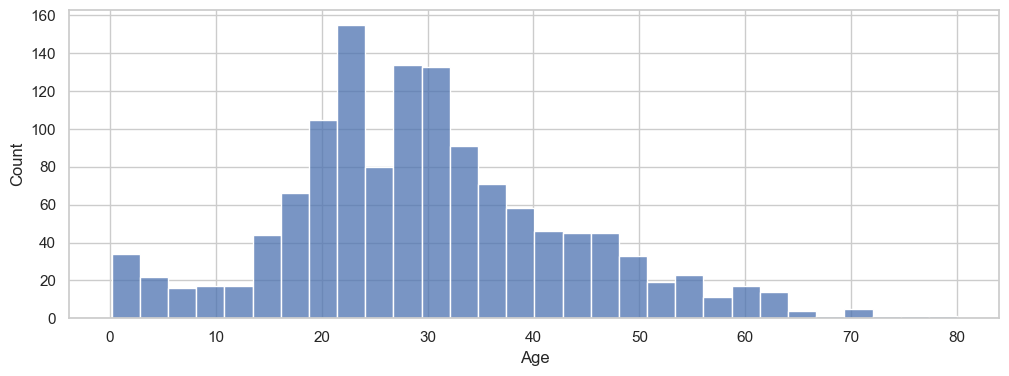

In [11]:
# your code here

sns.histplot(x=titanic.Age);

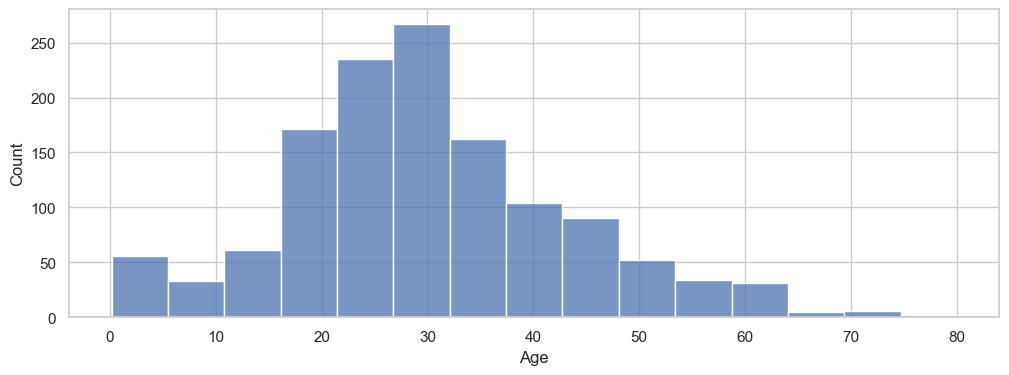

In [12]:
sns.histplot(x=titanic.Age, bins = 15);

#### How does the bin size affect your plot?

In [13]:
"""
Basically what it does, is brighten or close up the range so that you can get as more detail information without getting overwelmed 
with a hole lot of bars that would be the result of not putting the data in  bins.
"""

'\nBasically what it does, is brighten or close up the range so that you can get as more detail information without getting overwelmed \nwith a hole lot of bars that would be the result of not putting the data in  bins.\n'

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

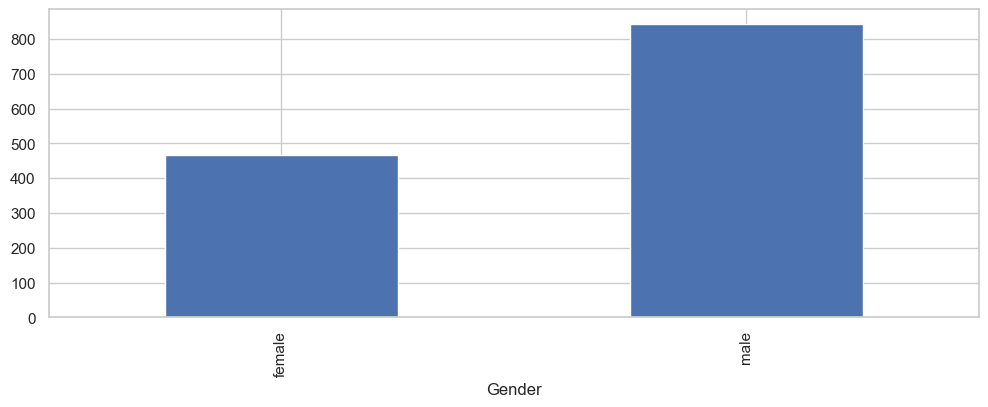

In [14]:
# Method 1 - matplotlib
# your code here
save = titanic.groupby("Gender")["Gender"].count().plot(kind="bar")
plt.show()

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_21891/3982059640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = titanic["Gender"], palette="magma");


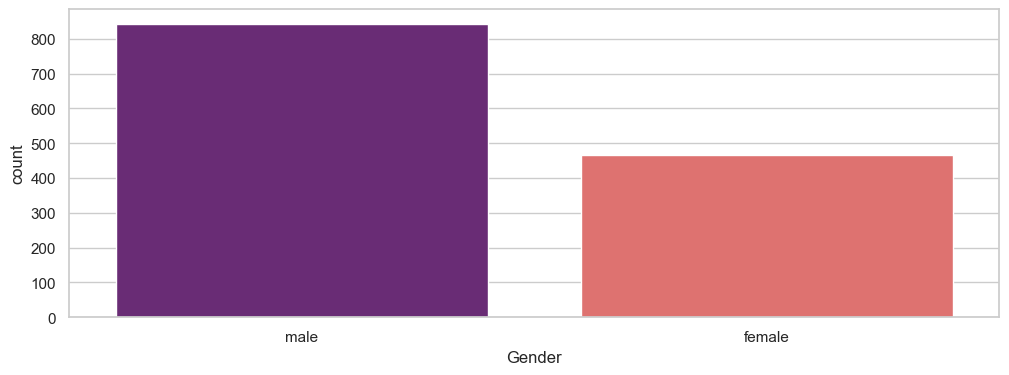

In [15]:
# Method 2 - seaborn
# your code here
sns.countplot(x = titanic["Gender"], palette="magma");

#### Use the right plot to visualize the column `Pclass`.

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_21891/1426588473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = titanic["Pclass"], palette="magma");


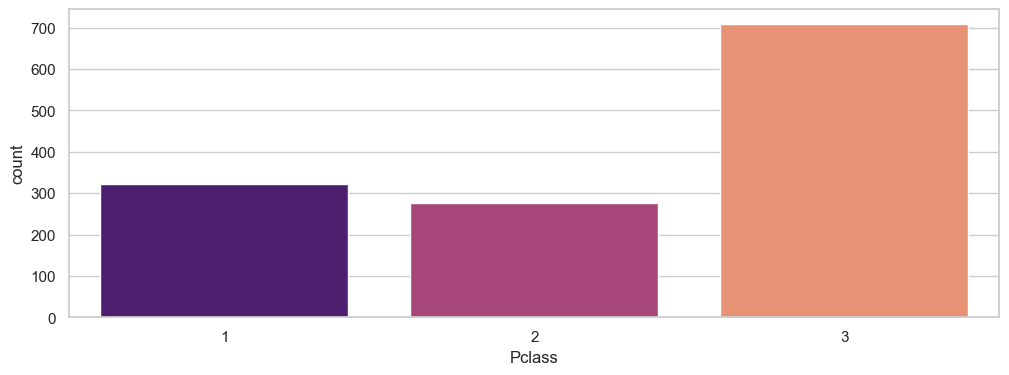

In [16]:
# your code here
sns.countplot(x = titanic["Pclass"], palette="magma");

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it and list all the info it's giving you.

[Hint](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

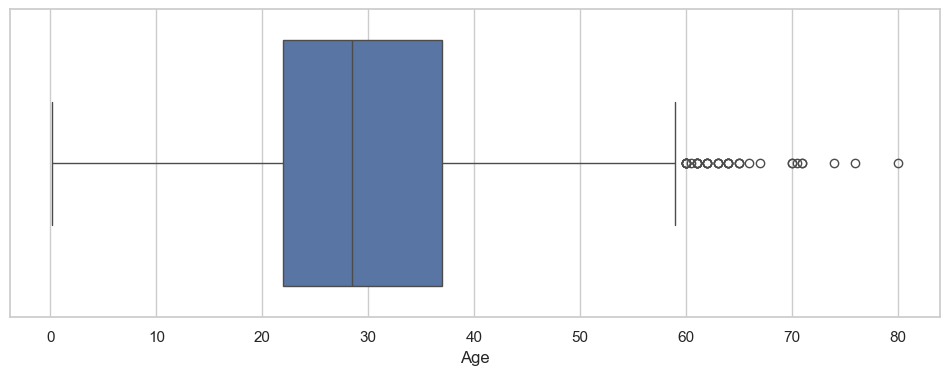

In [17]:
# your code here
sns.boxplot(x=titanic["Age"]);

In [18]:
"""
I actually don't quite understand it. But I think the Line in the middle is the mean, the two lines at the edges are the min and the max, a d the rest are the quartiles.
"""

"\nI actually don't quite understand it. But I think the middle range is where the most data is and then the rest of it is what it's scattered.\n"

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


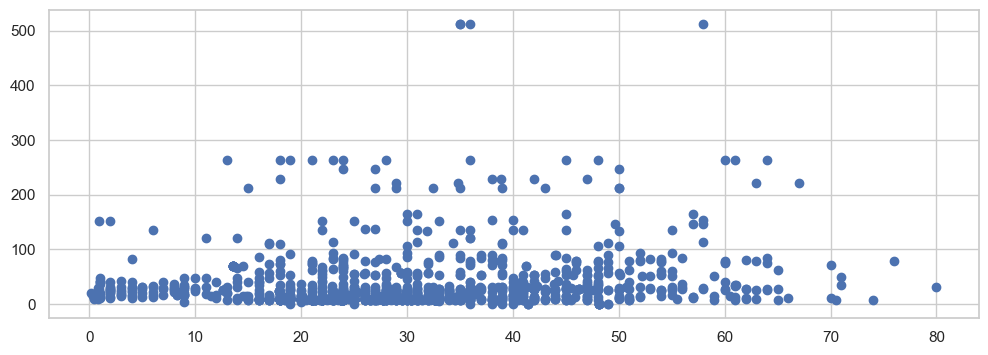

In [20]:
# Method 1 - matplotlib
# your code here
plt.scatter(x = titanic["Age"], y = titanic["Fare"])


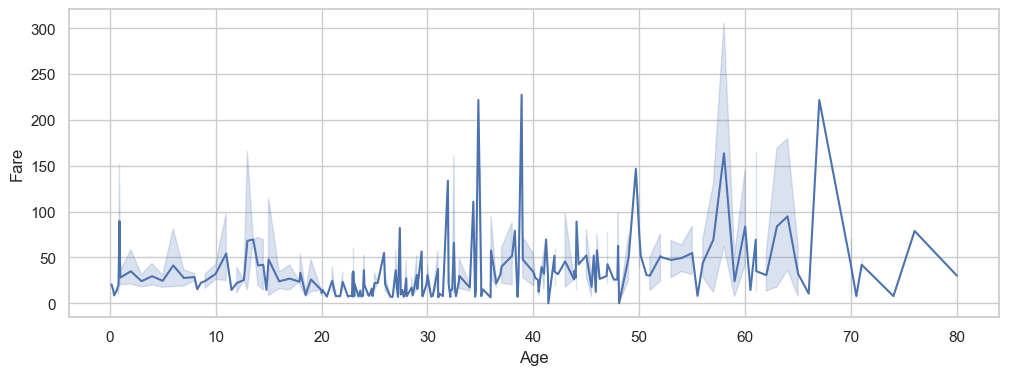

In [21]:
# Method 2 - seaborn
# your code here
sns.lineplot(x = titanic["Age"], y= titanic["Fare"]);

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_21891/3136149337.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = titanic["Age"], y= titanic["Fare"], palette="magma");


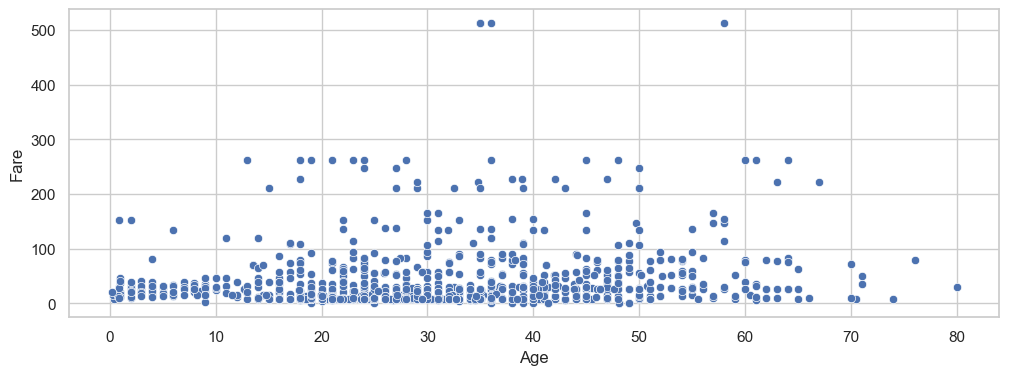

In [22]:
sns.scatterplot(x = titanic["Age"], y= titanic["Fare"], palette="magma");

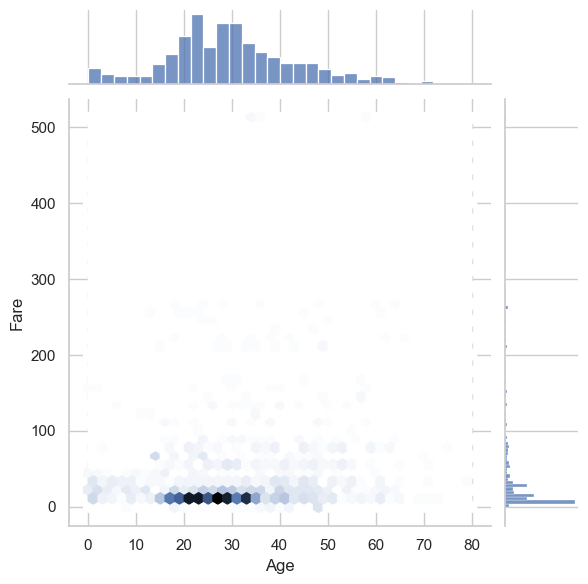

In [23]:
sns.jointplot(x="Age",y="Fare",data=titanic,kind='hex');

#### Plot the correlation matrix using seaborn.

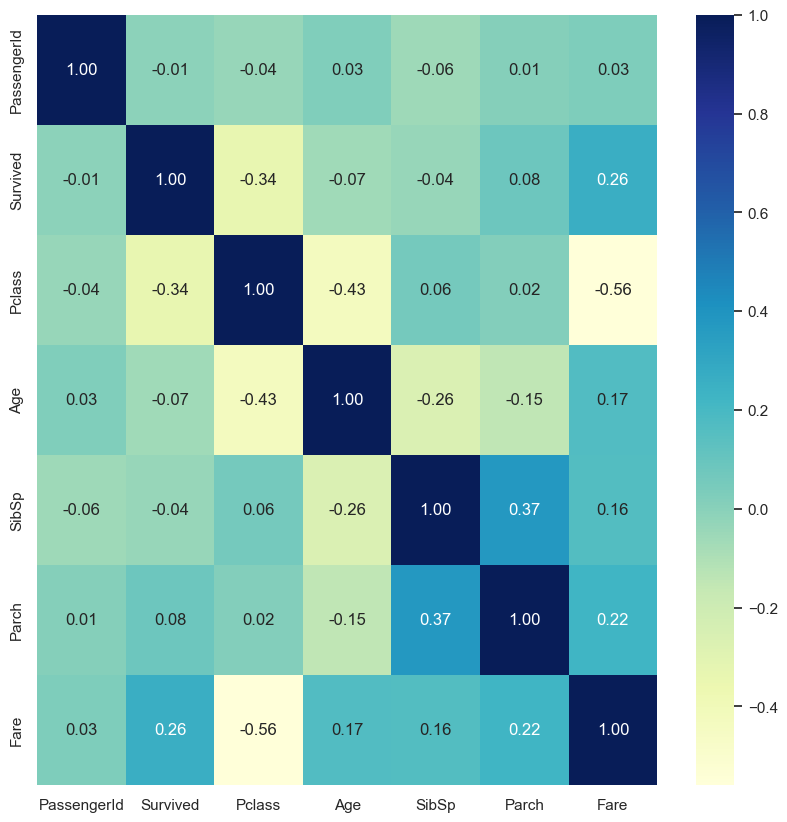

In [32]:
# your code here
plt.subplots(figsize=(10, 10))
sns.heatmap(int_.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

<Axes: >

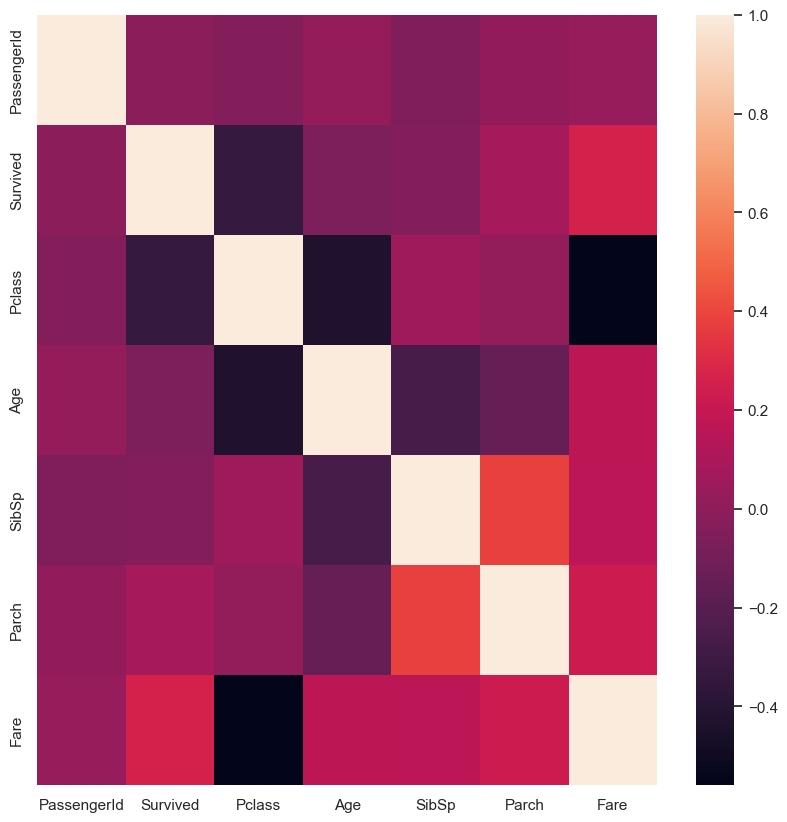

In [34]:
plt.subplots(figsize=(10, 10))
sns.heatmap(titanic.select_dtypes(["float", "int"]).corr()) 

#### What are the most correlated features?

In [25]:
"""
The closer to 1 is the most correlated. So I would say that Pclass and Fare are the most correlated and following would be pclass and Age,
and then Parch and SibSp.
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

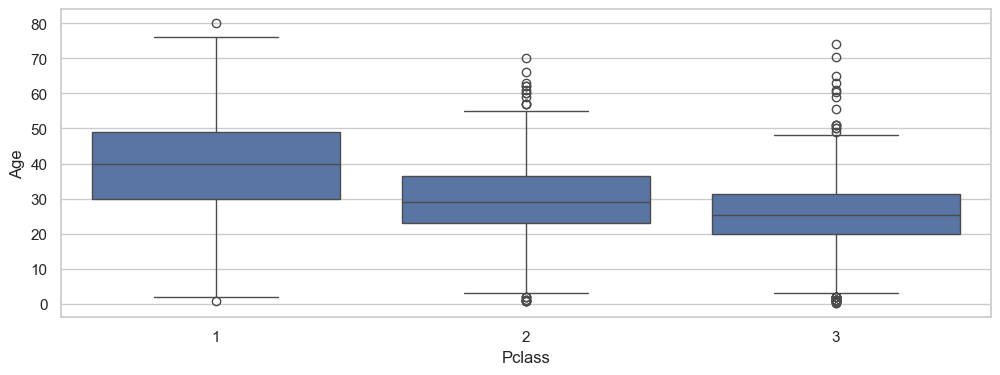

In [26]:
# your code here
sns.boxplot(data=titanic, x="Pclass", y="Age");

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

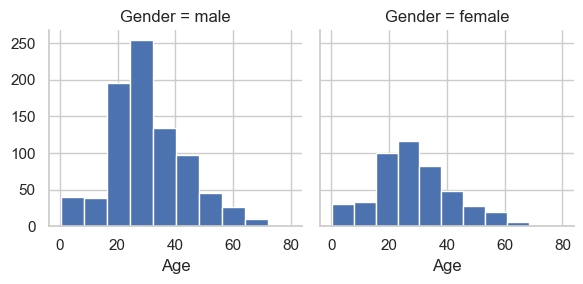

In [27]:
# your code here
facet_ = sns.FacetGrid(titanic, col="Gender")
facet_.map(plt.hist, "Age")
